<a href="https://colab.research.google.com/github/cstecker/comparative_politics/blob/main/Fehlermargen_in_(Wahl)umfragen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "obamas leas is now within the margin of error" - Wahlumfragen und Fehlermargen


Um zu prüfen, ob eine Suppe gut gewürzt ist, löffelt man einen kleinen Teil und verkostet diesen. Die Idee dahinter ist, dass die Kostprobe *repräsentativ* für die gesamte Suppe ist. Jeder Happen sollte wie die gesamte Suppe schmecken, so die Annahme. Man trifft am Kochtopf also einen induktiven Schluss, indem anhand einer Stichprobe auf Eigenschaften der Population geschlossen wird - auch wenn man in diesem Jargon sicher seltener in einer Suppenküche parliert. 
Wahlumfragen sind in diesem Sinne auch eine Suppenverkostung. Wir befragen einen kleinen Teil der Wählerschaft, ziehen also eine Stichprobe, um eine belastbare Ahnung zu bekommen, wie denn die gesamte Wählerschaft bei der nächsten Wahl abstimmen dürfte. 
Aber wie funktioniert das und was muss man bei der Interpretation beachten? Ein Suppenrezept haben wir nicht parat, aber wir können mal nachkochen bzw. simulieren, wie Umfragen funktionieren. Dazu generieren wir uns einen Beispieldatensatz. Wir sagen R, einen Datensatz mit 10000 Befragten zu basteln, die nach einer bestimmten Wahrscheinlichkeit eine bestimmte Parteien wählen. Diese Wahrscheinlichkeit passen wir an aktuelle Umfragen an. 

In [ ]:
# Wir basteln uns einen Datensatz der Sonntagsfrage
library(tidyverse)
library(tibble) # load the tibble package

set.seed(123) # set seed for reproducibility

# create a tibble with the parties and percentages 
# these values are from current polls (update according to e.g. wahlrecht.de)
parties <- tibble(party = c("CDU", "SPD", "Grüne", "FDP", "LINKE", "AfD", "Sonstige"),
                  percentage = c(0.31, 0.21, 0.16, 0.06, 0.045, 0.15, 0.065))

# generate a sample of 10,000 respondents with the specified percentages for each party
poll <- sample(parties$party, 10000, replace = TRUE, prob = parties$percentage)

# create a tibble with the poll results
population <- tibble(
  respondent = 1:10000,
  party_preference = poll)

# display the first few rows of the poll results tibble
head(poll_results)


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0
✔ purrr   1.0.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



respondent,party_preference
<int>,<chr>
1,CDU
2,AfD
3,SPD
4,Sonstige
5,FDP
6,CDU


Wir haben nun für 10000 simulierte Befragte eine Wahlabsicht. Wie würden denn die Stimmenanteile graphisch aussehen?

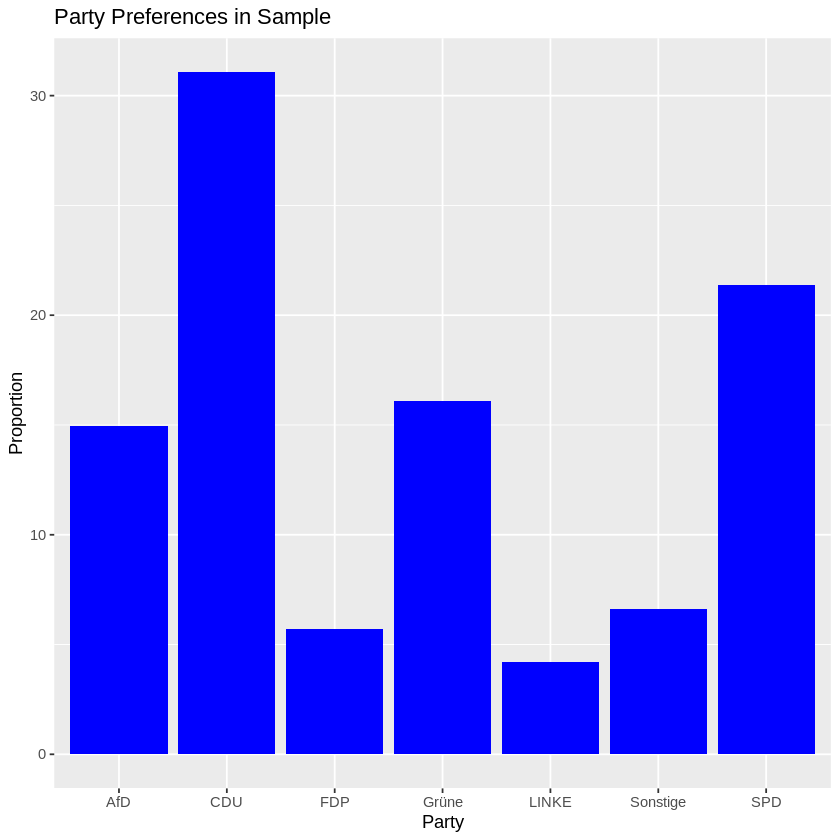

In [ ]:
population %>% 
  count(party_preference) %>% 
  mutate(perc = n/sum(n)*100) %>% 
  ggplot(aes(x = party_preference, y = perc)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(x = "Party", y = "Proportion", title = "Party Preferences in Population")

Nun ziehen wir eine Stichprobe (2%) aus der Grundgesamtheit.

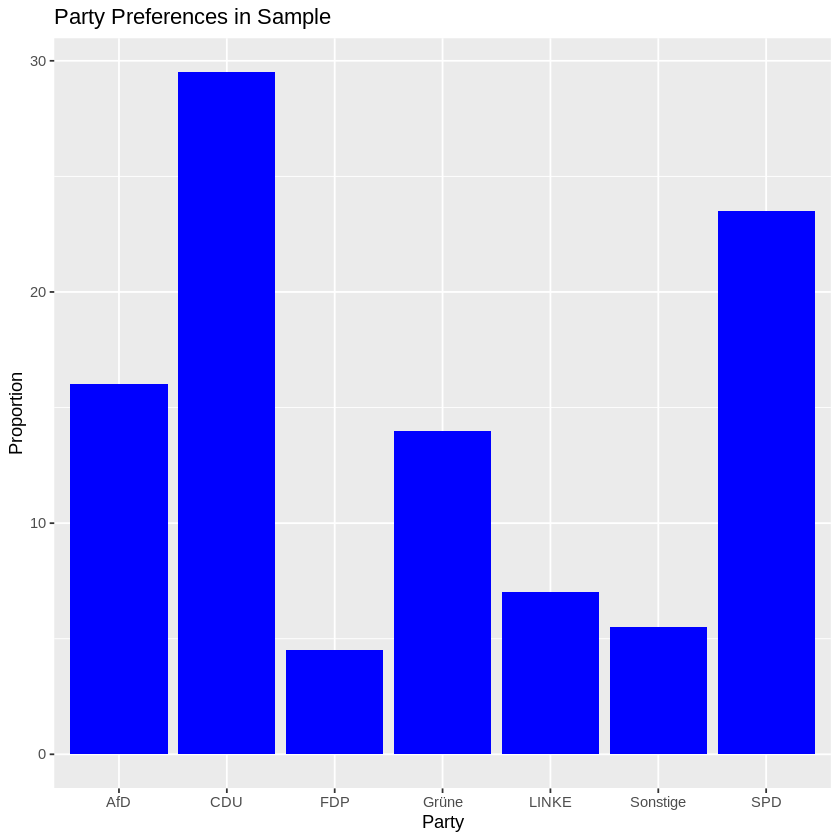

In [ ]:
sample <- population %>% 
  sample_frac(.02) %>% 
  count(party_preference) %>% 
  mutate(perc = n/sum(n)*100)

sample %>% 
  ggplot(aes(x = party_preference, y = perc)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(x = "Party", y = "Proportion", title = "Party Preferences in Sample")


Vergleichen wir mal die Werte aus der Population und der Stichprobe.